In [1]:
import pandas as pd
import numpy as np

**1) Si richiede di verificare le dimensioni del dataset e i relativi metadati**

In [2]:
covid = pd.read_csv("owid-covid-data.csv")

#inizio con un EDA accurata per capire e utilizzare nella miglior forma i dati.
print(covid.shape)         # (righe,colonne)
print("\n",covid.info())   # Tipi di dato
covid.head()               # Prime righe

(429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-nu

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


**2) a) Si chiede di trovare, per ogni continente il numero di casi fin dall'inizio della pandemia**

In [3]:
print("nulli per new_cases =",covid["new_cases"].isna().sum()) #mi serve un operatore per non avere problemi con i null
covid_clean = covid.dropna(subset=['location', 'continent']) #non voglio le sommare le aggregazioni gia esistenti di owid come OWID_AFR etc..
total_cases_per_continent = covid_clean.groupby('continent')['new_cases'].sum(min_count=1) #somma dei new_cases per continent con min_count per non avere problemi con nan di new_cases
formatted = total_cases_per_continent.map('{:,.0f}'.format).str.replace(',', '.', regex=False) #uso separatore delle migliaia per capire meglio l'output fatto
print("\n",formatted)
print("\n","Questo e' il numero di casi COVID19 per ogni continent")

nulli per new_cases = 19276

 continent
Africa            13.146.831
Asia             301.564.180
Europe           252.916.868
North America    124.492.698
Oceania           15.003.468
South America     68.811.012
Name: new_cases, dtype: object

 Questo e' il numero di casi COVID19 per ogni continent


**2) b)la percentuale rispetto al totale mondiale del numero di casi**

In [4]:
total_global_cases = total_cases_per_continent.sum() #troviamo il totale facendo somma dell'output precedente
percentuali = (total_cases_per_continent / total_global_cases) * 100 #trovo la percentuale rispetto al totale
percentuali_formattate = percentuali.map('{:.2f}'.format).str.replace('.', ',', regex=False) + '%' #uso map e regex per formattare l'output come desiderado
print(percentuali_formattate)
print("\n","Le percentuali aiutano a identificare con chiarezza le aree piu colpite dal COVID-19")

continent
Africa            1,69%
Asia             38,86%
Europe           32,60%
North America    16,04%
Oceania           1,93%
South America     8,87%
Name: new_cases, dtype: object

 Le percentuali aiutano a identificare con chiarezza le aree piu colpite dal COVID-19


**3) a)Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: l'evoluzione del casi totali dall'inizio alla fine dell'anno**

In [17]:
covid['date'] = pd.to_datetime(covid['date']) #passiamo la colonna date al formato datetima e non piu object
italia_2022 = covid[(covid['location'] == 'Italy')&(covid['date'].dt.year == 2022)] #filtro per avere l'output richiesto
italia_2022 = italia_2022[italia_2022['new_cases'].notna() & (italia_2022['new_cases'] > 0)] #filtro per non avere i nan (notna) e dove i casi sono > 0 per conferme intero positivo
italia_2022['total_cases_calc'] = italia_2022['new_cases'].cumsum() #calcolo cumulativo per avere l'evoluzione dei nuovi casi per il tempo (cosi da avere il grafico con questi assi)

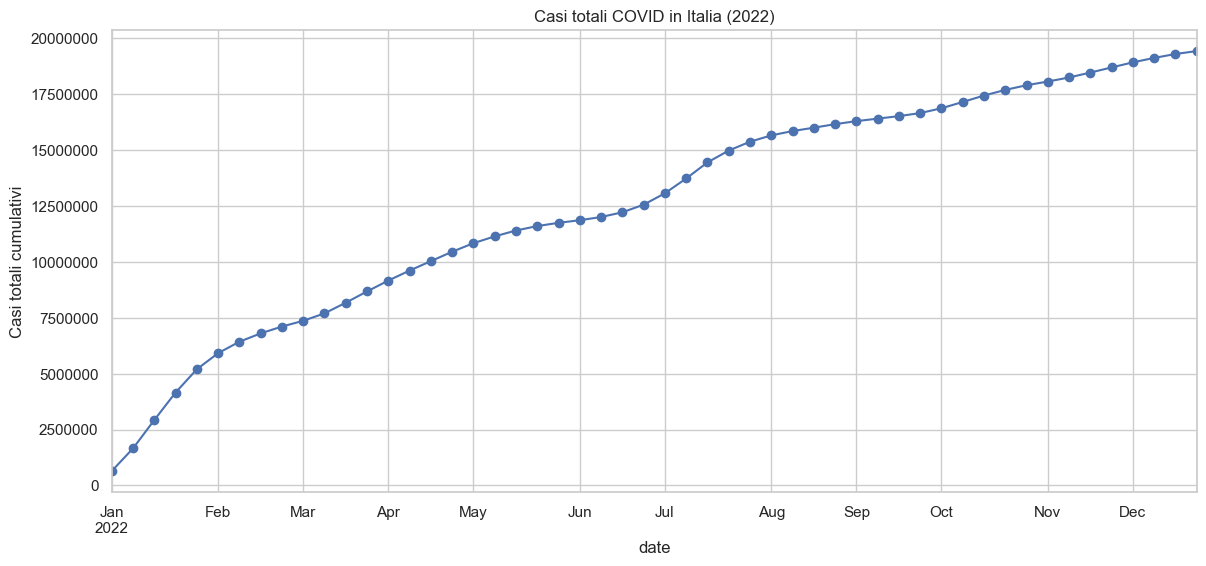

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

italia_2022.set_index('date')['total_cases_calc'].plot(marker='o', figsize=(14, 6)) #grafico con marcattore nei dati
plt.ticklabel_format(style='plain', axis='y') #funzione per mostrare il valore 'reale' nell'asse y
plt.title('Casi totali COVID in Italia (2022)') #titolo grafico
plt.ylabel('Casi totali cumulativi') #eticchetta asse Y 
plt.show() #show per mostrare la tabella senza nessun text (senza di questo mi mostrava text...etc.. )

**3) b)Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: il numero di nuovi casi rispetto alla data**

In [36]:
print(italia_2022['date'].diff().value_counts()) #confermiamo che il dato sia 'settimanale'

date
7 days    51
Name: count, dtype: int64


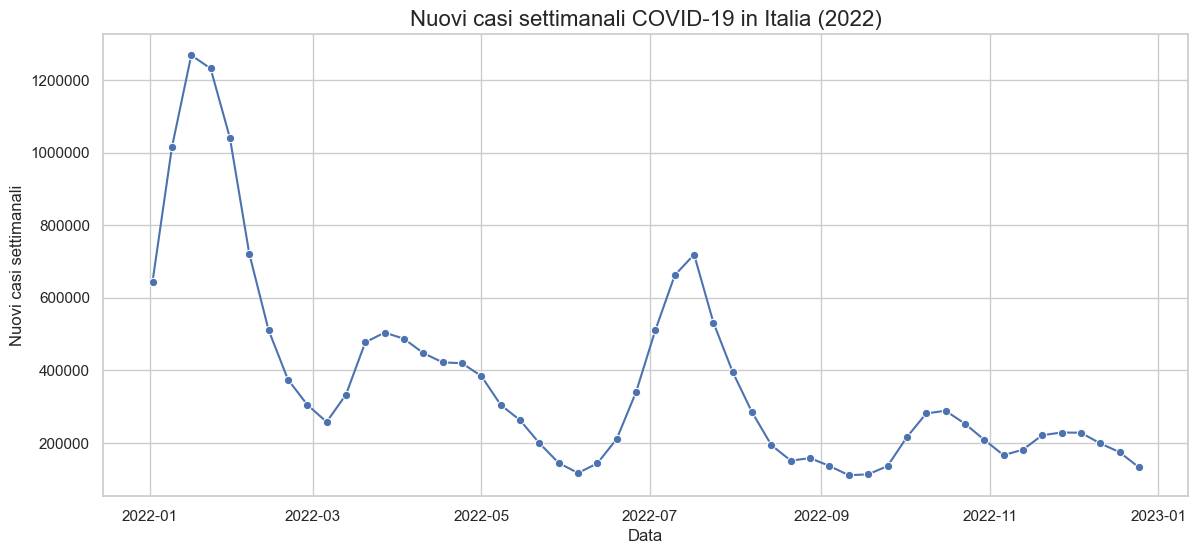

In [43]:
sns.set(style='whitegrid') #mettiamo la grid per analizzare meglio i dati
plt.figure(figsize=(14, 6)) #settiamo le dimensioni perche l'output era piccolo
sns.lineplot(data=italia_2022, x='date', y='new_cases', marker='o') #grafico con marcattore dati
plt.title('Nuovi casi settimanali COVID-19 in Italia (2022)', fontsize=16) #titolo
plt.xlabel('Data') #asse x
plt.ylabel('Nuovi casi settimanali') # asse y
#Disattivo la notazione scientifica
plt.ticklabel_format(style='plain', axis='y')

*Con il primo grafico si vede che l'andamento generale del covid ovvero il numero reale di casi e' stato alto nel fino all'ultimo mese (il quale ho fatto la cumsum, somma progressiva), gia con il secondo grafico si vede che il 'boom' del covid e' stato nelle prime settimane*

**4) a)Riguardo le nazioni di Italia, Germania e Francia: mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)**

In [44]:
nazioni = ['Italy', 'Germany', 'France']
inizio = '2022-05-01'
fine = '2023-04-30'

icu_data = covid[
    covid['location'].isin(nazioni) &
    (covid['date'] >= inizio) &
    (covid['date'] <= fine) &
    (covid['icu_patients'].notna())].copy()

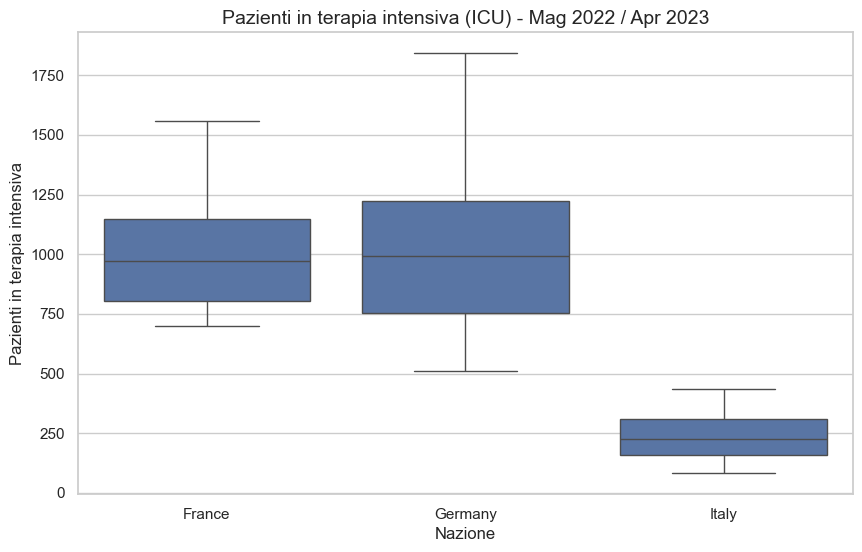

In [49]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.boxplot(data=icu_data, x='location', y='icu_patients')
              #Titolo e assi
plt.title('Pazienti in terapia intensiva (ICU) - Mag 2022 / Apr 2023', fontsize=14)
plt.xlabel('Nazione')
plt.ylabel('Pazienti in terapia intensiva')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**4) b)Riguardo le nazioni di Italia, Germania e Francia: scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante**

*Dal boxplot si vede che l'Italia ha avuto un numero molto piu basso di paziente in terapia intensiva rispetto a Francia e Germania, che mostrano valori piu alti e piu variabili il che indica un carico maggiore al sistema sanitario in quelle nazioni nel periodo che abbiamo considerato.*

**5) a)Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients)**

In [50]:
nazioni = ['Italy', 'Germany', 'France', 'Spain']

hosp_2021 = covid[
    (covid['location'].isin(nazioni)) &
    (covid['date'].dt.year == 2021) &
    (covid['hosp_patients'].notna())].copy()

hosp_totali = hosp_2021.groupby('location')['hosp_patients'].sum().sort_values(ascending=False)
print(hosp_totali)

location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


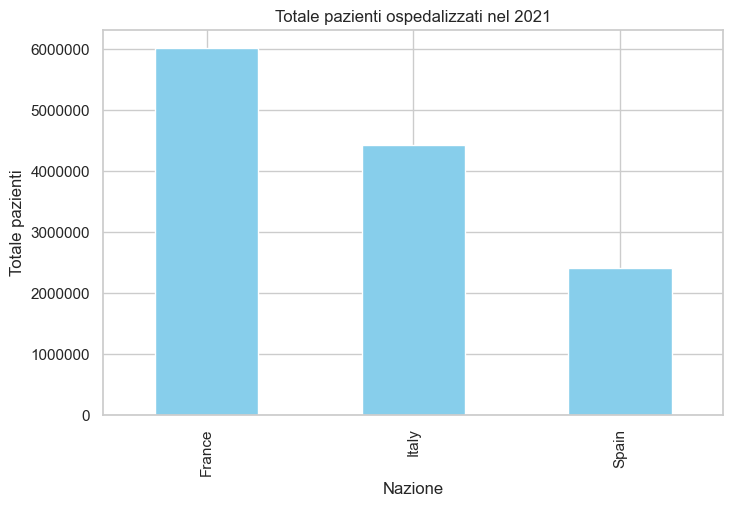

In [54]:
hosp_totali.plot(kind='bar', figsize=(8, 5), color='skyblue', title='Totale pazienti ospedalizzati nel 2021')
plt.xlabel('Nazione')
plt.ylabel('Totale pazienti')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**5) b) Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno**

In [56]:
mask = (covid['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (covid['date'].dt.year == 2021)
null_counts = covid[mask]['hosp_patients'].isnull().groupby(covid['location']).sum()
print(null_counts)

location
France       0
Germany    365
Italy        0
Spain        0
Name: hosp_patients, dtype: int64


La Germania non ha dati riguardo hosp_patients quindi va proprio esclusa dal grafico come output sopra. Non ha senso 'cambiare' i null presenti... neanche fare interpolazione, ffill.. purtroppo i dati mancano per tutto quel periodo, l'unica cosa sarebbe rintracciare nuovi database contenenti questi dati e andare a integrarli con un merge, oppure un ciclo for, cosi da avere i dati per il calcolo.

1) Per le colonne continent e location ho visto che ci sono valori gia aggregati come OWID_AFR (che sarebbe la aggregazione dell'Africa come esempio) quindi vengono escluse dalle analisi, per quello all'inizio ho fatto drop se ci sono nan in queste due colonne cosi da evitare l'aggregazione che dovevo fare per l'esercizio.
2) le colonne new_cases e total_cases sono rispettivamente i nuovi casi registrati e il totale di casi, pero nel totale di case potrebbero essere presenti anche errori come ad'esempio somma di un doppio 'caso' errore di battitura etc, quindi ho voluto escludere la mia analisi su quella colonna e concentrarmi su new_cases che ritratta i nuovi casi giornalieri.